# Data Mining – Spring 2024
# Homework 6: Text Classification

**Rules:**

*   The homework is worth 10 points.
*   You may use without proof any results presented in the course lectures or seminars, unless deriving those results is the direct subject of the assignment.
*   You may use any open sources with *mandatory* citation of references.
*   Plagiarism is not allowed. If cheating is detected, all parties involved in the violation will receive a grade of 0 for the assignment, even if it's possible to determine who copied from whom.
*   Try to make the code as efficient as possible. In particular, using loops will be penalized in cases where the operation can be performed using the tools of the libraries covered in the course.

In this homework assignment, you will build a text classifier.

The task is to predict the emotional sentiment of tweets about the coronavirus.



In [ ]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [ ]:
df = pd.read_csv('/content/tweets_coronavirus.csv', encoding='latin-1')
df.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
2080,6332,51284,"Charlotte, NC",17-03-2020,Post: COVID-19: What You Might Need If Youre Q...,Negative
134,3956,48908,"Palo Alto, CA",16-03-2020,Thank you @NorthgateGlzMrk for taking care of ...,Extremely Positive
28160,38332,83284,"New York, NY",08-04-2020,Somebody in line behind you at the grocery sto...,Positive
7642,13077,58029,"New York, USA",20-03-2020,"Everyone online: ""spead positivity during this...",Extremely Negative


In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
1,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
2,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
3,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
4,3804,48756,"ÃÂT: 36.319708,-82.363649",16-03-2020,As news of the regionÃÂs first confirmed COV...,Positive
...,...,...,...,...,...,...
33439,44949,89901,OHIO,14-04-2020,I never that weÃÂd be in a situation &amp; w...,Positive
33440,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive
33441,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
33442,44953,89905,NaN,14-04-2020,You know itÃÂs getting tough when @KameronWi...,Positive


For each tweet, the following is provided:

*   UserName - username, replaced with an integer for anonymity
*   ScreenName - display name, replaced with an integer for anonymity
*   Location - user location
*   TweetAt - tweet creation date
*   OriginalTweet - tweet text
*   Sentiment - tweet emotional sentiment (target variable)



## Task 1: Data Preparation (0.5 points)

The target variable is in the column `Sentiment`. Transform it into a binary variable: 1 if the tweet has positive emotional sentiment, and 0 if it has negative sentiment.

In [ ]:
# -- YOUR CODE HERE --
y_bin = ((df['Sentiment'] == 'Positive') | (df['Sentiment'] == 'Extremely Positive')).astype(int)
df['Sentiment'] = y_bin
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
1,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
2,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
3,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
4,3804,48756,"ÃÂT: 36.319708,-82.363649",16-03-2020,As news of the regionÃÂs first confirmed COV...,1
...,...,...,...,...,...,...
33439,44949,89901,OHIO,14-04-2020,I never that weÃÂd be in a situation &amp; w...,1
33440,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,1
33441,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,0
33442,44953,89905,NaN,14-04-2020,You know itÃÂs getting tough when @KameronWi...,1


Are the classes balanced?

In [ ]:
# -- YOUR CODE HERE --
df['Sentiment'].value_counts()

Sentiment
1    18046
0    15398
Name: count, dtype: int64

**Answer:** The class sizes are not equal, but the differences are relatively small, so overall it can be considered a balanced dataset.

Display information about missing values in the data. If missing values are present, fill them with the string 'Unknown'.

In [ ]:
# -- YOUR CODE HERE --
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33444 entries, 0 to 33443
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       33444 non-null  int64 
 1   ScreenName     33444 non-null  int64 
 2   Location       26395 non-null  object
 3   TweetAt        33444 non-null  object
 4   OriginalTweet  33444 non-null  object
 5   Sentiment      33444 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
df[df['Location'].isnull() == True]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
2,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
3,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
11,3813,48765,NaN,16-03-2020,ADARA Releases COVID-19 Resource Center for Tr...,1
16,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,1
17,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,1
...,...,...,...,...,...,...
33431,44938,89890,NaN,14-04-2020,Hello everyone \r\r\nPlease share this in your...,1
33437,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,1
33440,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,1
33441,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,0


In [ ]:
df['Location'].fillna(value = 'Unknown', inplace=True)


Split the data into training and test sets in a 7:3 ratio with `random_state=0`.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size= 0.3, random_state= 0)

In [ ]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
25621,35178,80130,Unknown,06-04-2020,Why we still want to buy so much stuff during ...,1
30135,40819,85771,"Boston, MA HQ",10-04-2020,With driving even more usage a strong strategy...,1
28899,39249,84201,India,09-04-2020,@Canon_India I am very happy.. Great job by @C...,1
5989,11068,56020,"Mayfair, London, UK",19-03-2020,The U.S national debt will likely exceed $30 T...,0
4367,9109,54061,WNC,18-03-2020,"Finally got to the grocery store. Honestly, wh...",1
...,...,...,...,...,...,...
20757,29120,74072,Unknown,31-03-2020,Football is in ruins right now.When it will re...,0
32103,43291,88243,"Waterville, Ireland Austin, TX",13-04-2020,Hand sanitizer made here on the Skellig Coast!...,1
30403,41159,86111,"Mumbai , Delhi India",10-04-2020,An initiative taken by our @GOLDENINITIATI1 ...,1
21243,29702,74654,Unknown,01-04-2020,Vile premiership players demanding full wages ...,0


In [ ]:
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
28168,38343,83295,London,08-04-2020,What will the post-COVID-19 consumer look like...,1
19874,28015,72967,"Baltimore, MD",26-03-2020,It's crazy how going to the grocery store is s...,0
31702,42798,87750,"Tokyo-to, Japan",12-04-2020,Best online stores to buy things from Tokyo an...,1
5110,10012,54964,Ohio,19-03-2020,#AngelaMerkel Nails #Coronavirus Speech ÃÂ U...,1
30081,40750,85702,"Detroit, MI",10-04-2020,Just saw someone at the grocery store lick the...,0
...,...,...,...,...,...,...
5847,10903,55855,Yorkshire ÃÂ UK ÃÂ Europe,19-03-2020,As a supermarket assistant went through my bas...,1
3220,7693,52645,India,18-03-2020,#NewsAlert | The benchmark West Texas Intermed...,0
11637,17912,62864,Lexington/Phoenix,21-03-2020,ItÃÂs starting. Sh*tÃÂs getting weird.\r\r...,0
21149,29590,74542,Unknown,01-04-2020,@henrymcmaster I work in a definitely nonessen...,1


## Task 2: Tokenization (3 points)

Create a dictionary based on the training dataset and count the frequency of each token using the simplest tokenization method: splitting texts by whitespace characters and converting tokens to lowercase.

In [ ]:
from collections import Counter

tweet_train = train['OriginalTweet']
tweet_test = test['OriginalTweet']
sent = ' '.join(tweet_train).lower().split()
count_word = Counter(sent)



What is the size of the dictionary?

In [ ]:
# -- YOUR CODE HERE --
print('Размер словаря:', len(count_word))

Размер словаря: 79755


Display the 10 most frequent tokens along with their counts. Explain why these specific tokens appear at the top of the list.

In [ ]:
# -- YOUR CODE HERE --
sorted_words = sorted(count_word.items(), key=lambda item:(-item[1], item[0]))
dict(sorted_words[:10])

{'the': 26815,
 'to': 23373,
 'and': 14684,
 'of': 13012,
 'a': 11737,
 'in': 11198,
 'for': 8566,
 '#coronavirus': 8223,
 'is': 7383,
 'are': 7050}

**Answer:** These specific words appear at the top because they are stop words—words that carry little semantic meaning but are essential for sentence structure (articles, prepositions, etc.). Additionally, the hashtag #coronavirus stands out as it is directly related to the topic of the tweets, hence its high frequency.

Remove stop words from the dictionary and display the new top-10 tokens (along with their counts). What can you say about it?

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords", quiet=True)
# -- YOUR CODE HERE --
for k in sorted_words:
  if k[0] in stopwords.words("english"):
   sorted_words.remove(k)
dict(sorted_words[:10])

{'#coronavirus': 8223,
 'prices': 3891,
 'food': 3820,
 'grocery': 3469,
 'supermarket': 3288,
 'people': 3175,
 'covid-19': 3173,
 'store': 3155,
 '#covid19': 2471,
 '&amp;': 2314}

**Answer:** Now, more relevant words and hashtags remain, providing a better understanding of the tweets' content. It's evident that most words are related to products, prices, supermarkets (stores), while the hashtags are associated with COVID-19.

Also, display the 20 least frequent words (if there are more than 20 least frequent words, show any 20 of them). Why are these tokens so infrequent, and do they require any additional processing?

In [ ]:
# -- YOUR CODE HERE --
dict(sorted_words[-20:])

{'ã\x82â£8.99!!!': 1,
 'ã\x82â£9.99.': 1,
 'ã\x82â£925m': 1,
 'ã\x82â£94/week': 1,
 'ã\x82â£cashtag': 1,
 'ã\x82â©': 1,
 'ã\x82â«auto': 1,
 'ã\x82â«banking': 1,
 'ã\x82â«it,': 1,
 'ã\x82â«travel,': 1,
 'ã\x82â\xad': 1,
 'ã\x82â²': 1,
 'ã\x82â»,': 1,
 'ã\x82â».': 1,
 'ã\x82â»bitte': 1,
 'ã\x83â\x87a': 1,
 'ã\x83â\x93lã\x83â²hun': 1,
 'ã\x83â¨': 1,
 'ã\x83â©conomie.': 1,
 'ã\x83â¼berweist': 1}

**Answer:** These tokens are infrequent because they are not actual words; they appear to be encoding artifacts or other meaningless strings. Therefore, they appear the least often. Since they carry no meaningful information, they do not require additional processing.



Now, let's use a better tokenizer - TweetTokenizer from the nltk library. Apply it and examine the top-10 most frequent words. How does it differ from the previous top list? Why?

In [ ]:
from nltk.tokenize import TweetTokenizer

# -- YOUR CODE HERE --
twitter = TweetTokenizer()
# twitter.tokenize(tweet)
tweet_count = Counter()
for k in tweet_train:
  token = twitter.tokenize(k.lower())
  tweet_count.update(token)


In [ ]:
sorted_tweet_words = sorted(tweet_count.items(), key=lambda item:(-item[1], item[0]))
dict(sorted_tweet_words[:10])

{'the': 26993,
 '.': 24118,
 'to': 23478,
 ',': 17571,
 'and': 14825,
 'of': 13044,
 'a': 11891,
 'in': 11348,
 '?': 9524,
 '#coronavirus': 8808}

**Answer:** The top list differs from the previous ones because it includes punctuation marks. This happens because TweetTokenizer is specifically designed for tweets and does not exclude punctuation, which can indicate emotional sentiment rather than just grammatical structure (for example, "(" to express sadness).

Remove stop words and punctuation from the dictionary, then examine the new top-10 words along with their frequency counts. Is there anything in this list that does not resemble actual words?

In [ ]:
from string import punctuation

# -- YOUR CODE HERE --
noise = list(punctuation) + stopwords.words("english")
tweet_words_new = [(word, count) for word, count in tweet_count.items() if word not in noise]
tweet_words_new = sorted(tweet_words_new, key=lambda item:(-item[1], item[0]))
dict(tweet_words_new[:10])

{'#coronavirus': 8808,
 'â': 7415,
 '\x82': 7311,
 '19': 7167,
 'covid': 6253,
 'prices': 4601,
 '\x92': 4372,
 'food': 4367,
 'store': 3877,
 'supermarket': 3805}

**Answer:** We can see that the top list contains tokens that do not resemble actual words. One of them looks like a number, while three others resemble encoded values.

Remove from the dictionary tokens consisting of a single character and tokens with a Unicode code point of 128 or higher (`ord(x) >= 128`).

Display the top-10 most frequent and top-20 least frequent words. How do the resulting top lists differ from the final top lists obtained using whitespace tokenization? What is now better and what is worse?

In [ ]:
# -- YOUR CODE HERE --

del_symb = [word for word, count in dict(tweet_words_new).items() if (len(word) == 1) and (ord(word) >= 128)]
tweet_words_new_del = [(word, count) for word, count in dict(tweet_words_new).items() if word not in del_symb]
dict(tweet_words_new_del[:10])

{'#coronavirus': 8808,
 '19': 7167,
 'covid': 6253,
 'prices': 4601,
 'food': 4367,
 'store': 3877,
 'supermarket': 3805,
 'grocery': 3523,
 'people': 3463,
 '#covid19': 2589}

In [ ]:
dict(tweet_words_new_del[-20:])

{'zooming': 1,
 'zoopla': 1,
 'zorb': 1,
 'zororo': 1,
 'zouzou': 1,
 'zp': 1,
 'zu': 1,
 'zuckerberg': 1,
 'zumba': 1,
 'zumbuehl': 1,
 'zumindest': 1,
 "zuppardo's": 1,
 'zur': 1,
 'zuschlã': 1,
 'zusendung': 1,
 'zwd': 1,
 'zwoferink': 1,
 'zzz': 1,
 'zã': 1,
 'âºper': 1}

**Answer:** Now, the top most frequent words list no longer contains tokens that do not resemble actual words, except for hashtags. The top least frequent words list contains letter combinations that cannot be interpreted as words—these might be abbreviations, but without context, it's unclear.

Display the top-10 most frequent hashtags along with their counts. What can you say about them?

In [ ]:
# -- YOUR CODE HERE --
hashtag = [(word, count) for word, count in dict(tweet_words_new_del).items() if word.startswith('#')]
dict(hashtag[:10])

{'#coronavirus': 8808,
 '#covid19': 2589,
 '#covid_19': 1734,
 '#covid2019': 946,
 '#toiletpaper': 744,
 '#covid': 641,
 '#socialdistancing': 465,
 '#coronacrisis': 448,
 '#pandemic': 257,
 '#coronaviruspandemic': 249}

**Answer:** Overall, all hashtags are related to the coronavirus theme, but they don't particularly indicate emotional sentiment—rather, they reflect the general topic of the tweet.

Do the same for links to the website https://t.co. Is the popularity of links comparable to the popularity of hashtags? Would information about a link to a specific page be useful?

In [ ]:
# -- YOUR CODE HERE --
link = [(word, count) for word, count in dict(tweet_words_new_del).items() if word.startswith('https://t.co')]
dict(link[:10])

{'https://t.co/oxa7swtond': 5,
 'https://t.co/gp3eusapl8': 4,
 'https://t.co/3gbbdpdjat': 3,
 'https://t.co/aziqcdgrnn': 3,
 'https://t.co/bylqxrjmnt': 3,
 'https://t.co/catkegayoy': 3,
 'https://t.co/deftrui1pfã\x82â': 3,
 'https://t.co/e2znxajpre': 3,
 'https://t.co/g63rp042ho': 3,
 'https://t.co/kuwipf1kqw': 3}

**Answer:** Links are much less popular than hashtags, so their popularity is incomparable. I also think that information from links would not be useful, as the main information about the emotional sentiment is already contained in the post itself, and the link might only cause confusion.

Using insights from previous experiments, let's write our own tokenizer by improving TweetTokenizer. The `tokenize` function should:

*   Convert text to lowercase
*   Apply TweetTokenizer for initial token extraction
*   Remove stop words, punctuation, single-character tokens, tokens with a Unicode code point of 128 or higher, and t.co links



In [ ]:
def custom_tokenizer(text):

  # -- YOUR CODE HERE --
  noise = list(punctuation) + stopwords.words("english")
  tw = TweetTokenizer()
  tokens = tw.tokenize(text.lower())
  tokens_to_del = [word for word in tokens if (len(word) == 1) and (ord(word) >= 128)]
  tokens = [word for word in tokens if (word not in noise) and (word not in tokens_to_del) and not (word.startswith('https://t.co'))]
  return tokens


In [ ]:
custom_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext')

['sample', 'text', '@sample_text', '#sampletext']

## Task 3: Text Vectorization (2 points)

Train a CountVectorizer using custom_tokenizer as the tokenizer. How does the size of the resulting vocabulary compare to the size of the original vocabulary from the beginning of Task 2?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=custom_tokenizer)
cv.fit_transform(tweet_train)
print("Размер полученного словаря:", len(cv.get_feature_names_out()))
print("Размер словаря из задания №2:", len(count_word))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Размер полученного словаря: 45308
Размер словаря из задания №2: 79755


**Answer:** The size of the resulting vocabulary is significantly smaller than the original vocabulary, by 34,447. Most likely, the new vocabulary will be better in terms of informativeness and word quality.

Let's look at a specific tweet:

In [ ]:
ind = 9023
train.iloc[ind]['OriginalTweet'], train.iloc[ind]['Sentiment']

('Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs',
 0)

The author of the tweet is unhappy with the food situation in France, and the text has a sharply negative tone.

Apply the trained CountVectorizer to vectorize this text, and try to identify the most important token and the least important token (the token whose component in the vector is maximum/minimum, excluding zeros). Were they identified well, and why?

In [ ]:
# -- YOUR CODE HERE --
t = cv.transform([train.iloc[ind]['OriginalTweet']])
max_index = np.argmax(t.toarray())
min = np.argmin(t.toarray()[t.toarray() != 0])
min_index = np.where(t.toarray()[t.toarray() != 0])[0][min]
feature_names = cv.get_feature_names_out()
most_important_token = feature_names[max_index]
least_important_token = feature_names[min_index]

print("Самый важный токен:", most_important_token)
print("Самый неважный токен:", least_important_token)

Самый важный токен: #coronavirusoutbreak
Самый неважный токен: ###covid-19


**Answer:** The tokens were poorly identified because they don't convey anything about the tweet's emotional sentiment. As mentioned earlier, hashtags tend to reflect the general topic of the tweet rather than its emotional tone.

Now apply TfidfVectorizer and determine the most important/least important tokens. Were they well identified, and why?

In [ ]:
# -- YOUR CODE HERE --
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(tokenizer=custom_tokenizer)
tv.fit_transform(tweet_train)
d = tv.transform([train.iloc[ind]['OriginalTweet']])
max_index = np.argmax(d.toarray())
min = np.argmin(t.toarray()[t.toarray() != 0])
min_index = np.where(t.toarray()[t.toarray() != 0])[0][min]
feature_names = tv.get_feature_names_out()
most_important_token = feature_names[max_index]
least_important_token = feature_names[min_index]

print("Самый важный токен:", most_important_token)
print("Самый неважный токен:", least_important_token)

Самый важный токен: brainless
Самый неважный токен: ###covid-19


**Answer:** In this case, the most important token (*brainless*) typically indicates a negative sentiment in the text, while the least important token is a hashtag, which is not very informative. Therefore, it can be concluded that using TfidfVectorizer resulted in more appropriate token identification for sentiment analysis.


Find a positively-toned tweet where TfidfVectorizer effectively (usefully for sentiment determination) identifies an important token, and explain the example.

*Hint:* You can search for explicitly positive tweets using positive words (good, great, amazing, etc.).

In [ ]:
train[train['OriginalTweet'].apply(lambda x: 'good' in x) & (train['Sentiment'] == 1)]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
21541,30079,75031,Unknown,02-04-2020,"To all my marketers friends, this is a very go...",1
20314,28576,73528,"New Delhi, India",27-03-2020,India on lockdown...I'm more worried by death ...,1
192,4035,48987,"San Diego, CA",16-03-2020,"What's a good way to support grocery store, me...",1
5140,10048,55000,New Zealand,19-03-2020,Countdown supermarket limiting some goods: You...,1
19139,27090,72042,Unknown,25-03-2020,@MorganRadford good segment! BTW where did yo...,1
...,...,...,...,...,...,...
19361,27366,72318,Unknown,26-03-2020,@jichiemin LetÃÂs hope it not #coronavirus ?...,1
6250,11382,56334,"Mumbai, India",19-03-2020,Respected Sir @narendramodi \r\r\n\r\r\nWe und...,1
15997,23260,68212,sales@esmmagazine.com,24-03-2020,#Consumer goods giant @Unilever Plc said on Tu...,1
18819,26706,71658,"Chicago, IL",25-03-2020,Online grocery shopping? Here are some good ti...,1


In [ ]:
# -- YOUR CODE HERE --

p = tv.transform([train[train['OriginalTweet'].apply(lambda x: 'good' in x) & (train['Sentiment'] == 1)]['OriginalTweet'].loc[192]])
max_index = np.argmax(p.toarray())
min = np.argmin(t.toarray()[t.toarray() != 0])
min_index = np.where(t.toarray()[t.toarray() != 0])[0][min]
feature_names = tv.get_feature_names_out()
most_important_token = feature_names[max_index]
least_important_token = feature_names[min_index]

print("Самый важный токен:", most_important_token)
print("Самый неважный токен:", least_important_token)


Самый важный токен: pizza
Самый неважный токен: ###covid-19


**Answer:** The most important token cannot be considered "good" because it says almost nothing about the text's sentiment. It simply means that this particular token appeared less frequently in other tweets compared to the other tokens in this tweet.

## Task 4: Training First Models (1 point)

Apply both vectorizers to obtain feature matrices for the texts. Extract the target variable.

In [ ]:
# -- YOUR CODE HERE --
train_cv = cv.fit_transform(tweet_train)
train_tv = tv.fit_transform(tweet_train)
test_cv = cv.transform(tweet_test)
test_tv = tv.transform(tweet_test)
y_train = train['Sentiment']
y_test = test['Sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train a logistic regression model on vectors from both vectorizers. Calculate the accuracy scores on the training and test data. Which vectorizer yielded better results? What can be said about the models?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(train_cv, y_train)

pred_train_cv = log_reg.predict(train_cv)
pred_test_cv = log_reg.predict(test_cv)

print(accuracy_score(y_train, pred_train_cv))
print(accuracy_score(y_test, pred_test_cv))

# -- YOUR CODE HERE --

0.9844510892780863
0.8672513454255532


In [ ]:
log_reg.fit(train_tv, y_train)

pred_train_tv = log_reg.predict(train_tv)
pred_test_tv = log_reg.predict(test_tv)

print(accuracy_score(y_train, pred_train_tv))
print(accuracy_score(y_test, pred_test_tv))

0.9254592054677488
0.8533984452860275


**Answer:** CountVectorizer showed better results. On both the test and training datasets, the accuracy of the logistic regression model trained with this method is higher than that of the model trained with the second method.

Overall, the models demonstrated fairly high accuracy on the test set, indicating that both models are of reasonably good quality.

## Task 5: Stemming (0.5 points)

To reduce the vocabulary size, stemming can be used.

Modify the written tokenizer by adding stemming using SnowballStemmer. Train the Count and Tfidf vectorizers. How has the vocabulary size changed?

In [ ]:
from nltk.stem.snowball import SnowballStemmer

def custom_stem_tokenizer(text):
  # -- YOUR CODE HERE --
  stemmer = SnowballStemmer("english")
  noise = list(punctuation) + stopwords.words("english")
  tw = TweetTokenizer()
  tokens = tw.tokenize(text.lower())
  tokens_to_del = [word for word in tokens if (len(word) == 1) and (ord(word) >= 128)]
  tokens = [stemmer.stem(word) for word in tokens if (word not in noise) and (word not in tokens_to_del) and not (word.startswith('https://t.co'))]
  return tokens

In [ ]:
custom_stem_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext adding more words to check stemming')

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

In [ ]:
cv = CountVectorizer(tokenizer=custom_stem_tokenizer)
cv.fit_transform(tweet_train)
print(len(cv.vocabulary_))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


36652


In [ ]:
tv = TfidfVectorizer(tokenizer=custom_stem_tokenizer)
tv.fit_transform(tweet_train)
print("Размер полученного словаря для TfidfVectorizer:", len(tv.get_feature_names_out()))


Размер полученного словаря для TfidfVectorizer: 36652


**Answer:** The vocabulary size decreased compared to the dictionaries from Tasks 2 and 3.

Train logistic regression using both vectorizers. Has the quality changed? Is there any value in applying stemming?

In [ ]:
# -- YOUR CODE HERE --
train_cv_stem = cv.fit_transform(tweet_train)
train_tv_stem = tv.fit_transform(tweet_train)
test_cv_stem = cv.transform(tweet_test)
test_tv_stem = tv.transform(tweet_test)

In [ ]:
log_reg_stem = LogisticRegression(max_iter=200, random_state=42)
log_reg_stem.fit(train_cv_stem, y_train)

pred_train_cv_stem = log_reg_stem.predict(train_cv_stem)
pred_test_cv_stem = log_reg_stem.predict(test_cv_stem)

print(accuracy_score(y_train, pred_train_cv_stem))
print(accuracy_score(y_test, pred_test_cv_stem))


0.9718923536950022
0.8672513454255532


In [ ]:
log_reg_stem.fit(train_tv_stem, y_train)

pred_train_tv_stem = log_reg_stem.predict(train_tv_stem)
pred_test_tv_stem = log_reg_stem.predict(test_tv_stem)

print(accuracy_score(y_train, pred_train_tv_stem))
print(accuracy_score(y_test, pred_test_tv_stem))

0.9158906450234943
0.8560892963922663


**Answer:** The quality on the training set slightly decreased, while on the test set it remained almost unchanged, so applying stemming is not beneficial in this case.

## Task 6: Working with Frequencies (1.5 points)

Another way to reduce the number of features is to use the `min_df` and `max_df` parameters when constructing the vectorizer. These parameters help limit the required token frequency across documents.

By default, all tokens that appear at least once are included.



Select `max_df` such that the vocabulary size becomes 36,651 (1 less than the original size). Why is the resulting parameter so large/small?

In [ ]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        max_df=7000
                        ).fit(
                            # -- YOUR CODE HERE --
                            tweet_train
                            )
print(len(cv_df.vocabulary_))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


36651


**Answer:** The obtained value is quite large. This means that there is exactly one word that occurs more than 7,000 times. Therefore, to reduce the dimensionality by 1, a large value for `max_df` had to be set.

Select `min_df` (using the default value of `max_df`) in CountVectorizer so that the vocabulary size is 3,700 tokens (when using the tokenizer with stemming), while maintaining the same quality as before. What can be said about the results?

In [ ]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        min_df=# -- YOUR CODE HERE --
                        11
                        ).fit(
                            # -- YOUR CODE HERE --
                            tweet_train
                            )
print(len(cv_df.vocabulary_))

3700


In [ ]:
# -- YOUR CODE HERE --
train_cv_stem_df = cv_df.transform(tweet_train)
test_cv_stem_df = cv_df.transform(tweet_test)
log_reg_stem_df = LogisticRegression(max_iter=200, random_state=42)
log_reg_stem_df.fit(train_cv_stem_df, y_train)

pred_train_cv_stem_df = log_reg_stem_df.predict(train_cv_stem_df)
pred_test_cv_stem_df = log_reg_stem_df.predict(test_cv_stem_df)

print(accuracy_score(y_train, pred_train_cv_stem_df))
print(accuracy_score(y_test, pred_test_cv_stem_df))

0.9286629645450662
0.8680486346422165


**Answer:** It can be said that to create a vocabulary of size 3,700 and maintain the model's quality, the minimum token frequency (`min_df`) should be set to 11. This means a token will be added to the vocabulary only if it appears in the tweets at least 11 times.

In previous tasks, features were not scaled. Scale the data (using a vocabulary of size 3,700 tokens vectorized with CountVectorizer), train a logistic regression model, evaluate the quality, and plot a `barplot` containing the top 10 tokens with the highest absolute positive/negative weights. What can be said about these tokens?

In [ ]:
from sklearn.preprocessing import StandardScaler
# -- YOUR CODE HERE --
scaler = StandardScaler(with_mean=False)
bow = scaler.fit_transform(train_cv_stem_df)
bow_test = scaler.transform(test_cv_stem_df)

log_reg_stem_df_scale = LogisticRegression(max_iter=600, random_state=42)
log_reg_stem_df_scale.fit(bow, y_train)

bow_train_pred = log_reg_stem_df_scale.predict(bow)
bow_test_pred = log_reg_stem_df_scale.predict(bow_test)

print(accuracy_score(y_train, bow_train_pred))
print(accuracy_score(y_test, bow_test_pred))

0.9416915847928236
0.8446282639027307


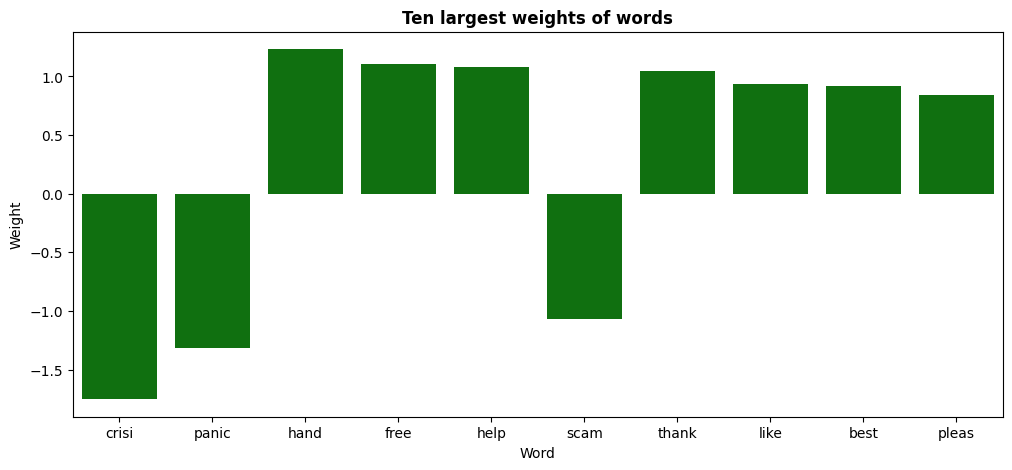

In [ ]:
sort_weight = log_reg_stem_df_scale.coef_
df_weight = pd.DataFrame(sort_weight, columns=cv_df.get_feature_names_out())
ten_largest = df_weight.iloc[0].abs().nlargest(10)

plt.figure(figsize=(12, 5), dpi=100)
plt.title('Ten largest weights of words', fontsize=12, fontweight='bold')
plt.ylabel("Weight")
plt.xlabel("Word")
sns.barplot(x=ten_largest.index, y=df_weight.iloc[0].loc[ten_largest.index], color='g')
plt.show()


**Answer:** These tokens are very good at characterizing the sentiment of the tweets, as they generally relate to positive or negative emotions.

## Task 7: Other Features (1.5 points)

We focused on working with the text of the tweets and did not use other features—usernames, date, and location.

Examine the features `UserName` and `ScreenName`. Are they useful? If they are, encode them, add them to the scaled feature matrix, train a logistic regression model, and measure its quality.

In [ ]:
# -- YOUR CODE HERE --
train['UserName'].value_counts()

UserName
35178    1
35598    1
26660    1
9581     1
8447     1
        ..
20801    1
30276    1
20045    1
32319    1
7104     1
Name: count, Length: 23410, dtype: int64

In [ ]:
train['ScreenName'].value_counts()

ScreenName
80130    1
80550    1
71612    1
54533    1
53399    1
        ..
65753    1
75228    1
64997    1
77271    1
52056    1
Name: count, Length: 23410, dtype: int64

**Answer:** The username and screen name do not provide any useful information for determining the tweet's sentiment, as each value is unique to each tweet and appears exactly once.

Examine the `TweetAt` feature in the training dataset: convert it to datetime type and draw a histogram with colors split based on the target variable. Is it useful? If it is, encode it, add it to the scaled feature matrix, train a logistic regression model, and measure its quality.

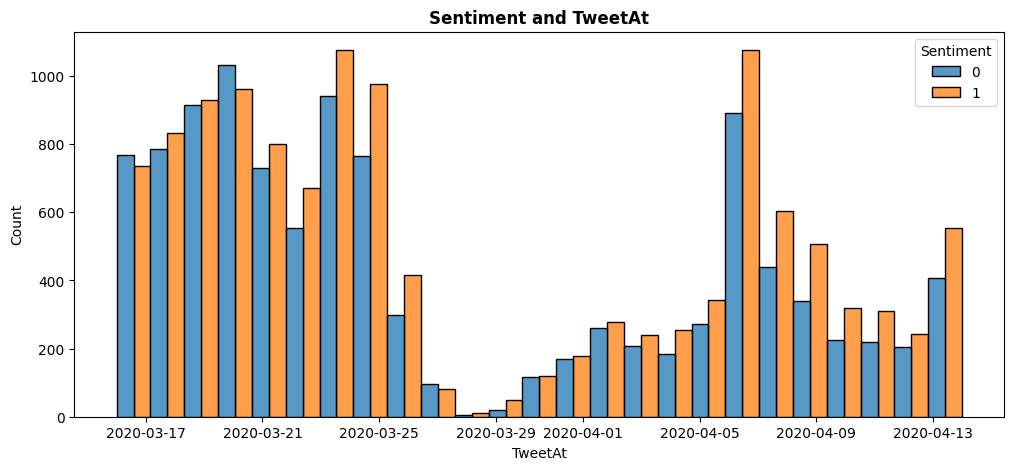

In [ ]:
# -- YOUR CODE HERE --
from seaborn import histplot

train['TweetAt'] = pd.to_datetime(train['TweetAt'], format= "%d-%m-%Y")
plt.figure(figsize=(12, 5), dpi=100)
plt.title('Sentiment and TweetAt', fontsize=12, fontweight='bold')
histplot(data=train, x='TweetAt', hue='Sentiment', multiple='dodge')
plt.show()

**Answer:** The histogram shows that the number of positive and negative tweets does not change significantly depending on the tweet date. Therefore, this feature does not need to be added to the matrix for logistic regression training, as it is not useful.



Work with the `Location` feature in the training dataset. How many unique values does it have?

In [ ]:
# -- YOUR CODE HERE --
train['Location'].nunique()

7949

Create a histogram of the top 10 most popular locations (excluding Unknown).

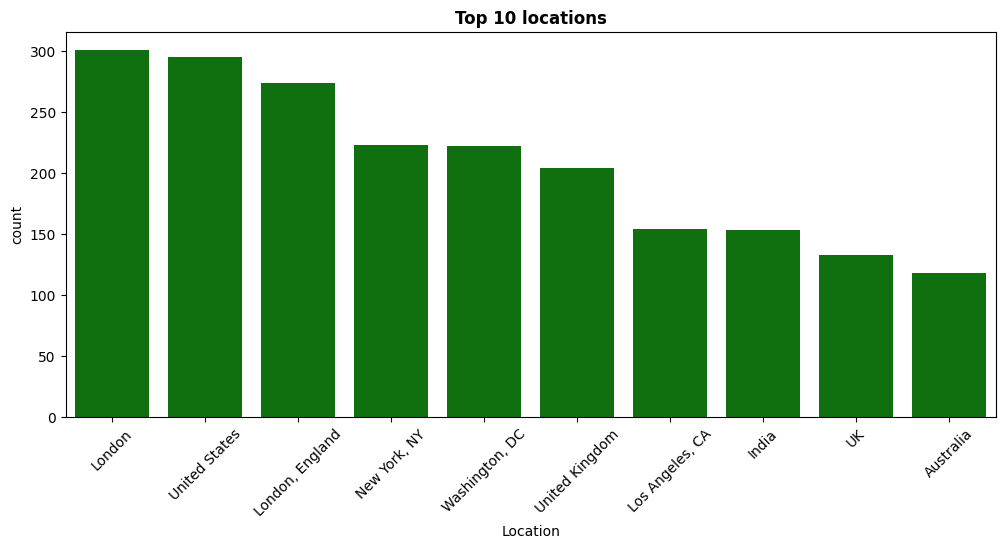

In [ ]:
# -- YOUR CODE HERE --

m = train[train['Location'] != 'Unknown']['Location'].value_counts().nlargest(10)
plt.figure(figsize=(12, 5), dpi=100)
plt.title('Top 10 locations', fontsize=12, fontweight='bold')
sns.barplot(data = m, color='g', )
plt.xticks(rotation=45)
plt.show()

It is evident that many locations include more specific place names than others (for example, some have London, UK; while others have just UK or United Kingdom).

Create a new feature `WiderLocation` that contains the broadest location (for example, from London, UK it should become UK). How many unique categories are there now? Construct a similar histogram.

Количество уникальных категорий: 4627


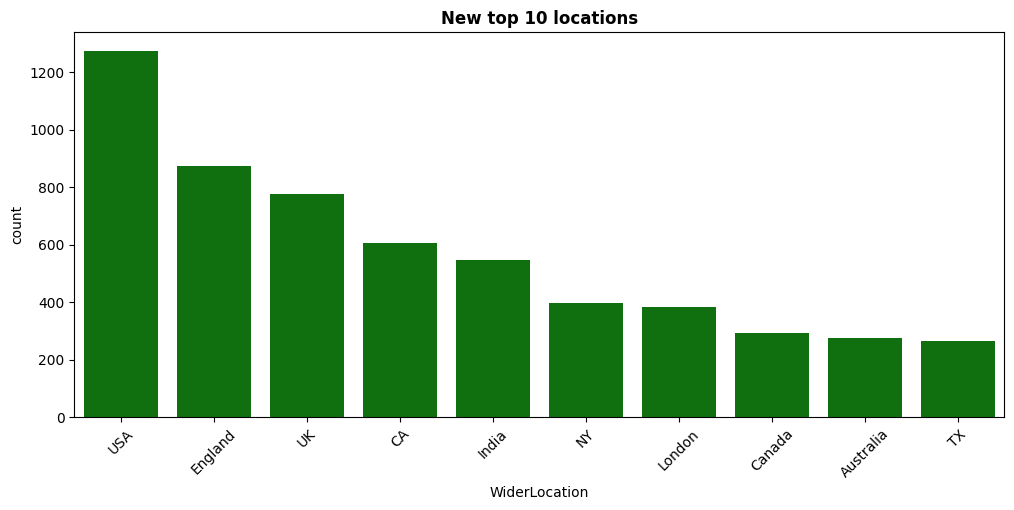

In [ ]:
# -- YOUR CODE HERE --

train['WiderLocation'] = train['Location'].apply(lambda x: x.split(',')[-1].strip())
train['WiderLocation'] = train['WiderLocation'].replace({"United Kingdom": 'UK', 'United States': 'USA', 'US': 'USA'})
k = train[train['WiderLocation'] != 'Unknown']['WiderLocation'].value_counts().nlargest(10)
print('Количество уникальных категорий:', train[train['WiderLocation'] != 'Unknown']['WiderLocation'].nunique())
plt.figure(figsize=(12, 5), dpi=100)
plt.title('New top 10 locations', fontsize=12, fontweight='bold')
sns.barplot(data = k, color='g', )
plt.xticks(rotation=45)
plt.show()

Encode the `WiderLocation` feature using OHE (One-Hot Encoding) in such a way that columns are created only for locations that occur more than once. How many such values are there?


In [ ]:
# -- YOUR CODE HERE --

Add this feature to the matrix of scaled textual features, train a logistic regression model, and measure its quality. How has it changed? Did the feature prove useful?

*Hint:* Use the `categories` parameter in the encoder.

In [ ]:
# -- YOUR CODE HERE --

**Ответ:** # -- YOUR ANSWER HERE --

## Task 8: Good Quality (Bonus 1 point)

Achieve an accuracy of 0.9 on the test set (you can change the tokenizer, vectorizer, model, etc.).

In [ ]:
# -- YOUR CODE HERE --

log_reg = LogisticRegression(C=0.5, max_iter=200, random_state=21)
log_reg.fit(train_cv, y_train)

pred_train_cv = log_reg.predict(train_cv)
pred_test_cv = log_reg.predict(test_cv)

print(accuracy_score(y_train, pred_train_cv))
print(accuracy_score(y_test, pred_test_cv))

0.9717214865442119
0.8682479569463823


0.9717214865442119
0.8682479569463823